# Credit Scoring App:
Case study :
The process of accepting a consumer credit must be very fast in
especially when customers require store credit at checkout.
purchase (example: payment in three installments free of charge, etc.).
For a very long time, banks and credit organizations have developed
automatic and instant methods of rating the creditworthiness of customers and
their ability to repay the loan. These tools are very useful for an acceptance
rapid credit granting, but also to determine the amount of the envelope
credit authorization or to monitor the risk of customers and
loan portfolios.
Credit score is a function that assigns a credit quality value to a
customer or a loan according to explanatory variables such as the debt ratio
of the borrower, his account behavior or any other quantity that is
correlated to borrower default.

### 1-set up the environment:

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from tqdm import notebook
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
print("set up completed")

set up completed


### 2-load the data:

In [52]:
df = pd.read_csv("./CreditScoring.csv")

In [53]:
df.shape

(5960, 13)

In [54]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [55]:
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [56]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [57]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [58]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


#### missing value .

In [59]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [60]:
df.BAD.value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

### 3-calculate information Gain:
Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable. A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

In [61]:
def make_mi_scores(x:pd.DataFrame, y:pd.DataFrame) -> pd.DataFrame:
    mi_scores = mutual_info_classif(x,y)
    mi_scores = pd.DataFrame(mi_scores, index=x.columns,columns=["score"])
    mi_scores = mi_scores.sort_values(by="score",ascending=False)
    return mi_scores

In [62]:
df_for_score = df.copy()

In [63]:
df_for_score.REASON.unique()

array(['HomeImp', nan, 'DebtCon'], dtype=object)

In [64]:
df_for_score.JOB.unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [65]:
reason_mapping = {
    "HomeImp":0,
    "DebtCon":1
}
job_mapping = {
    "Other":0,
    "Office":1,
    "Sales":2,
    "Mgr":3,
    "ProfExe":4,
    "Self":5
}

In [66]:
df_for_score.REASON = df_for_score.REASON.map(reason_mapping)
df_for_score.JOB = df_for_score.JOB.map(job_mapping)

In [67]:
df_for_score.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,0.0,0.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,0.0,0.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,0.0,0.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,0.0,1.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


code a function that will plot the mutual information score :

In [68]:
def plot_scores(mi_scores:pd.DataFrame) -> None:
    mi_scores["index"] = mi_scores.index
    sns.barplot(x="score",y="index",data=mi_scores)

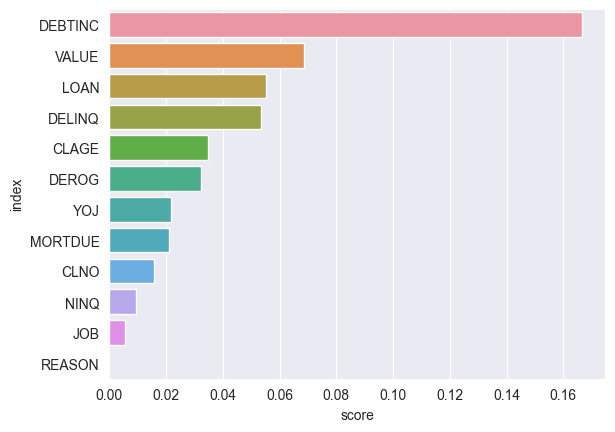

In [69]:
X = df_for_score.drop('BAD',axis=1)
y = df_for_score.BAD
X = X.fillna(0)
plot_scores(make_mi_scores(X,y))


try difference handle missing value to choose the best one of theme :

In [70]:
df_for_score.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [71]:
df_for_score.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON     float64
JOB        float64
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [72]:
X = df_for_score.drop('BAD',axis=1)
y = df_for_score.BAD
X = X.fillna(0)
X.loc[:,["REASON","JOB"]]

,REASON,JOB
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
5955,1.0,0.0
5956,1.0,0.0
5957,1.0,0.0
5958,1.0,0.0


### 4-split the data into train and test data:

In [73]:
X = df.drop('BAD',axis=1)
y = df.BAD
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [74]:
x_train.head()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2857,15900,48563.0,64679.0,DebtCon,ProfExe,4.0,0.0,0.0,156.101381,2.0,12.0,27.808547
5294,29200,116202.0,160084.0,DebtCon,ProfExe,6.0,0.0,0.0,124.121462,3.0,26.0,32.644530
4511,23500,55731.0,89079.0,DebtCon,Mgr,4.0,0.0,0.0,273.674380,1.0,25.0,33.509409
2150,13400,5900.0,55320.0,HomeImp,Other,3.0,2.0,2.0,234.021816,3.0,16.0,19.089301
1564,11400,43530.0,56600.0,HomeImp,Other,21.0,0.0,0.0,114.982979,0.0,23.0,39.481663


In [75]:
y_train.head()

2857    0
5294    0
4511    0
2150    1
1564    0
Name: BAD, dtype: int64

### 5-create a pipeline with scikit-learn for your model and train it :

In [76]:
numerical_cols = X.select_dtypes(['float','int']).columns
categorical_cols = X.select_dtypes(['object']).columns

In [77]:
numerical_cols

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')

In [78]:
categorical_cols

Index(['REASON', 'JOB'], dtype='object')

In [79]:
# Preprocessing for numerical data.
numerical_transformer = SimpleImputer(strategy="median")

# Preprocessing for categorical data.
categorical_transformer = Pipeline(
    steps=[
        ('impute',SimpleImputer(strategy="most_frequent")),
        ('one_hot_encoding',OneHotEncoder(handle_unknown='ignore',))
    ]
)

#Bundle preprocessing for numerical and categorical data.
preprocessing = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_cols),
        ('categorical', categorical_transformer, categorical_cols)
    ]
)

In [89]:
best_n_estimators = None
scores = list()
best_score = 0
for i in notebook.tqdm(range(1,1000,10)):
    model = RandomForestClassifier(n_estimators=i,random_state=0)
    my_pipe_line = Pipeline(
        steps=[
            ('preprocessing', preprocessing),
            ('model', model)
        ]
    )
    score = cross_val_score(my_pipe_line, x_train, y_train, cv=5, scoring='f1').mean()
    scores.append(score)
    if score >= best_score:
        best_score = score
        best_n_estimators = i

  0%|          | 0/100 [00:00<?, ?it/s]

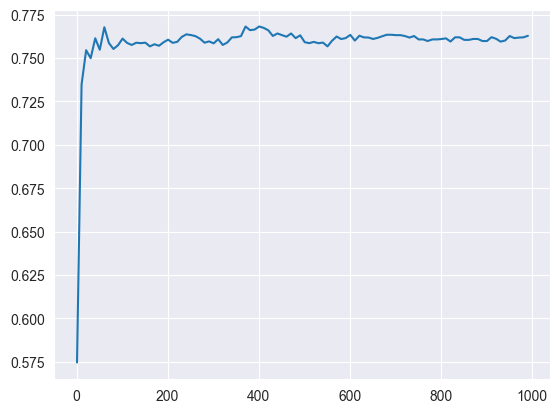

In [90]:
plt.plot(np.arange(1,1000,10),scores)

In [91]:
best_n_estimators,best_score

(401, 0.7681713947378224)

  0%|          | 0/8 [00:00<?, ?it/s]

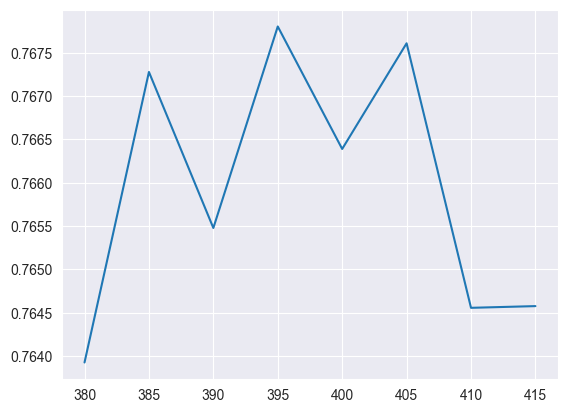

In [92]:
best_n_estimators = None
scores = list()
best_score = 0
for i in notebook.tqdm(range(380,420,5)):
    model = RandomForestClassifier(n_estimators=i,random_state=0)
    my_pipe_line = Pipeline(
        steps=[
            ('preprocessing', preprocessing),
            ('model', model)
        ]
    )
    score = cross_val_score(my_pipe_line, x_train, y_train, cv=5, scoring='f1').mean()
    scores.append(score)
    if score >= best_score:
        best_score = score
        best_n_estimators = i
plt.plot(np.arange(380,420,5),scores)

In [93]:
best_n_estimators,best_score

(395, 0.7678040644290627)

In [94]:
model = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('model', RandomForestClassifier(n_estimators=i,random_state=0))
    ]
)
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['REASON', 'JOB'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(n_estimators=415, random_state=0))])

In [96]:
y_predict = model.predict(x_test)
f1_score(y_test,y_predict)

0.7843137254901961